# TP3 – Performance d’un classifieur

In [1]:
from TP3_ETU import *
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import multivariate_normal, norm 
from PIL import Image

## I. Chargement et visualisation des données

Questions \
Comment sont constituées les bases d’apprentissage et de test ?  Quelle est la dimension des 
données ? Combien y a-t-il de classes et d’exemples de chaque classe ?

In [2]:
print(f"dimentions base d'apprentissage X_train: {X_train.shape}")
print(f"dimentions base d'apprentissage X_train: {X_test.shape}")
print(f"Il y a {X_train.shape[1]} classes : \n\
      {X_train.shape[0]} exemples de chaques classes dans la base d'entraînement\n\
      {X_test.shape[0]} exemples de chaques classes dans la base de test")
print(f"Il y a {100*X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]):.2f}% des données dans la base de d'entraînement")
print(f"Les données sont de dimention 1")

dimentions base d'apprentissage X_train: (4739627, 2)
dimentions base d'apprentissage X_train: (566200, 2)
Il y a 2 classes : 
      4739627 exemples de chaques classes dans la base d'entraînement
      566200 exemples de chaques classes dans la base de test
Il y a 89.33% des données dans la base de d'entraînement
Les données sont de dimention 1


Réduction des données : on garde 1 pixel sur 1000\
(Changer de random state)

In [3]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=1/1000, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=1/1000, random_state=42)

In [4]:
print(f"dimentions base d'apprentissage X_train: {X_train.shape}")
print(f"dimentions base d'apprentissage X_test: {X_test.shape}")
print(f"Il y a {X_train.shape[1]} classes : \n\
      {X_train.shape[0]} exemples de chaques classes dans la base d'entraînement\n\
      {X_test.shape[0]} exemples de chaques classes dans la base de test")
print(f"Il y a {100*X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]):.2f}% des données dans la base de d'entraînement")
print(f"Les données sont de dimention 1")

dimentions base d'apprentissage X_train: (4739, 2)
dimentions base d'apprentissage X_test: (566, 2)
Il y a 2 classes : 
      4739 exemples de chaques classes dans la base d'entraînement
      566 exemples de chaques classes dans la base de test
Il y a 89.33% des données dans la base de d'entraînement
Les données sont de dimention 1


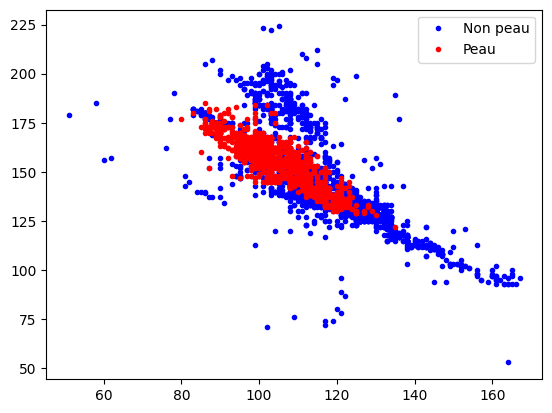

In [5]:
# #############################################################################
# I.	Chargement et visualisation des données

#Pixel peau
Peau_Train = X_train[np.where(y_train==1),:]
Peau_Train = np.reshape(Peau_Train,(Peau_Train.shape[1],Peau_Train.shape[2] ))
#Pixel non peau
Nonpeau_Train = X_train[np.where(y_train==0),:]
Nonpeau_Train = np.reshape(Nonpeau_Train,(Nonpeau_Train.shape[1],Nonpeau_Train.shape[2] ))


plt.plot(Nonpeau_Train[:,0], Nonpeau_Train[:,1], '.b', label='Non peau')
plt.plot(Peau_Train[:,0], Peau_Train[:,1], '.r', label='Peau')
plt.legend()
plt.show()


## II. Modélisation de la vraisemblance des observations par une loi normale 2D avec des dimensions décorrélées

### a. Estimation de la vraisemblance des observations des pixels de teinte chaire

In [6]:
# Déterminer 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr
mcb = np.mean(Peau_Train,axis=0)[0]
mcr = np.mean(Peau_Train,axis=0)[1]
scb = np.std(Peau_Train,axis=0)[0]
scr = np.std(Peau_Train,axis=0)[1]

Questions \
Pourquoi les variables sont-elles indicées par Cb et Cr ? Quelle est la dimension de 𝑚Cb, 𝑚Cr, 
𝜎Cb, 𝜎Cr ? 

Réponses:\
Cb : Chrominance bleue\
Cr : Chrominance rouge\
On a supprimé la Luminance car on veut être insensible à l'intensité lumineuse
Les dimensions de 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr sont toutes à 1

In [ ]:
# from scipy.stats import multivariate_normal, norm 
p1 = norm(mcb, scb) 
p2 = norm(mcr, scr) 
p_train = p1.pdf(X_train[:,0]) * p2.pdf(X_train[:,1]) 
p_test = p1.pdf(X_test[:,0]) * p2.pdf(X_test[:,1]) 

Questions \
Pour un pixel 𝒙 de teinte chaire donné, quelle est la dimension de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) ?  \
Quelle est la dimension du vecteur p_train? \
Quelle  hypothèse  nous  permet  d’estimer la valeur de la loi normale à partir de l’équation 
précédente ?

In [8]:
print('La dimention du vecteur p_train est : ',p_train.shape[0])
print('Pour 1 pixel de teinte chaire donné, p(x/chair) est de dimention 1')
print("C'est l'hypothèse de l'indépendance de Cb et Cr qui nous  permet  d’estimer la valeur de\n" \
" la loi normale à partir de l’équation précédente ")

La dimention du vecteur p_train est :  4739
Pour 1 pixel de teinte chaire donné, p(x/chair) est de dimention 1
C'est l'hypothèse de l'indépendance de Cb et Cr qui nous  permet  d’estimer la valeur de
 la loi normale à partir de l’équation précédente 


### b. Mise en place du classifieur 

In [9]:
mp_train = np.mean(p_train)
p_train_seuillee = [1 if p > mp_train else 0 for p in p_train ] #on seuille par mp_train

conf_matrice=confusion_matrix(y_train, p_train_seuillee) #(y_verité,y_prediction)
#créé matrice de confusion [0:NonChaire|1:Chaire]

conf_matrice = conf_matrice[::-1,::-1] #change l'ordre des classes
print("Matrice de confusion [0:Chaire|1:NonChaire]:\n",conf_matrice)
score = accuracy_score(y_train, p_train_seuillee)  # (y_verité,y_prediction)
print(f"taux de reconnaissance : {score*100:.2f} %")

Matrice de confusion [0:Chaire|1:NonChaire]:
 [[ 893  355]
 [ 760 2731]]
taux de reconnaissance : 76.47 %


Que  représentent  TP,  TN,  FP  et  FN ?  Comment  estimer  la  sensibilité  et  la  spécificité ? \
Comment estimer le taux de bonne classification ? Pourquoi avoir choisi ce seuil initial ?

Réponse:\
On a choisit ce seuil arbitrairement pour sa simplicité.\
Le sens du seuil (> ou <) a été choisi tel que l'on obtienne le meilleur taux de reconnaissance.

In [10]:

print("\nOn s'intéresse à la classe Chair (Positif = Chair)")
TP = conf_matrice[0,0]; TN = conf_matrice[1,1]
FP = conf_matrice[1,0]; FN = conf_matrice[0,1]
precision = TP/(TP+FP)
sensibilite = TP/(TP+FN)
specificite = TN/(FP+TN)
print(f"TP : {TP} (nb de Chair biens classés)")
print(f"TN : {TN} (nb de NonChair biens classés)")
print(f"FP : {FP} (nb de Chair classés NonChair)")
print(f"FN : {FN} (nb de NonChair classés Chair)")
print(f'sensibilité (ou rappel) (TPR) = {100*sensibilite:.1f} %')
print(f'spécificité (TNR) = {100*specificite:.1f} %')
print(f"taux de bonne reconnaissance (ou précision) (TP/P) = {100*precision:.1f} %")


On s'intéresse à la classe Chair (Positif = Chair)
TP : 893 (nb de Chair biens classés)
TN : 2731 (nb de NonChair biens classés)
FP : 760 (nb de Chair classés NonChair)
FN : 355 (nb de NonChair classés Chair)
sensibilité (ou rappel) (TPR) = 71.6 %
spécificité (TNR) = 78.2 %
taux de bonne reconnaissance (ou précision) (TP/P) = 54.0 %


### c. Courbe ROC

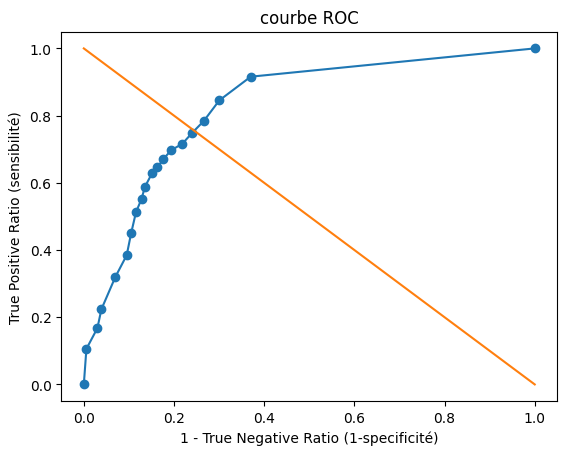

In [11]:
NB = 20
SEUILS = np.linspace(np.min(p_train), np.max(p_train), NB) 
sensibilites = []; specificites = []
for s in SEUILS :
    p_train_seuillee = [1 if p > s else 0 for p in p_train ] #on seuille par s
    conf_matrice=confusion_matrix(y_train, p_train_seuillee) #(y_verité,y_prediction)
    #Matrice de confusion [0:NonChaire|1:Chaire]
    TP = conf_matrice[1,1]; TN = conf_matrice[0,0]  #On prend en compte l'ordre pour que Prositif = chair
    FP = conf_matrice[0,1]; FN = conf_matrice[1,0]
    sensibilites.append(TP/(TP+FN))
    specificites.append(TN/(FP+TN))

specificites=np.array(specificites)
plt.plot(1-specificites,sensibilites,'o-')
plt.plot([0,1],[1,0])
plt.title('courbe ROC')
plt.xlabel("1 - True Negative Ratio (1-specificité)")
plt.ylabel("True Positive Ratio (sensibilité)");

Questions \
Déterminez sur la courbe ROC, parmi les seuils testés, le point de fonctionnement tel qu’il y ait 
environ le même taux de vrais positifs et de vrais négatifs. Que vaut le taux de reconnaissance 
pour ce point ? 

Réponse:\
Le point tel que le taux de vrais positifs (TPR) est égal au nombre de vrais négatifs (TNR ou 1-specificité) appelé Equal Error Rate est le point à l'intersection avec la droite y=-x (droite orange).

In [12]:
print("Au Point EER (approximatif: point le plus proche sur la courbe ROC) :")
rang_seuil_EER = [i for i,s in enumerate(sensibilites) if np.isclose(s, specificites[i],0.014)]
print(f'sensibilité : {sensibilites[rang_seuil_EER[0]]:.2f}\n\
specificité : {specificites[rang_seuil_EER[0]]:.2f}')

SEUIL_EER = SEUILS[rang_seuil_EER[0]]
p_train_seuillee = [1 if p > SEUIL_EER else 0 for p in p_train ] #on seuille par SEUIL_EER

conf_matrice=confusion_matrix(y_train, p_train_seuillee) #(y_verité,y_prediction)
#créé Matrice de confusion [0:NonChaire|1:Chaire]
print("Matrice de confusion [0:Chaire|1:NonChaire]:\n",conf_matrice)

score = accuracy_score(y_train, p_train_seuillee)  # (y_verité,y_prediction)
print(f"taux de reconnaissance : {score*100:.2f} %")


Au Point EER (approximatif: point le plus proche sur la courbe ROC) :
sensibilité : 0.75
specificité : 0.76
Matrice de confusion [0:Chaire|1:NonChaire]:
 [[2651  840]
 [ 313  935]]
taux de reconnaissance : 75.67 %


### d. Classification des pixels de test

In [13]:
p_test = p1.pdf(X_test[:,0]) * p2.pdf(X_test[:,1]) 
p_test_seuillee = [1 if p > SEUIL_EER else 0 for p in p_test ] #on seuille par SEUIL_EER

conf_matrice=confusion_matrix(y_test, p_test_seuillee) #(y_verité,y_prediction)
#créé Matrice de confusion [0:NonChaire|1:Chaire]
print("Matrice de confusion [0:Chaire|1:NonChaire]:\n",conf_matrice)

score = accuracy_score(y_test, p_test_seuillee)  # (y_verité,y_prediction)
print(f"taux de reconnaissance (point EER) des pixels de test: {score*100:.2f} %")

Matrice de confusion [0:Chaire|1:NonChaire]:
 [[295 117]
 [  4 150]]
taux de reconnaissance (point EER) des pixels de test: 78.62 %


## III. Modélisation de la vraisemblance des observations par une loi normale 2D

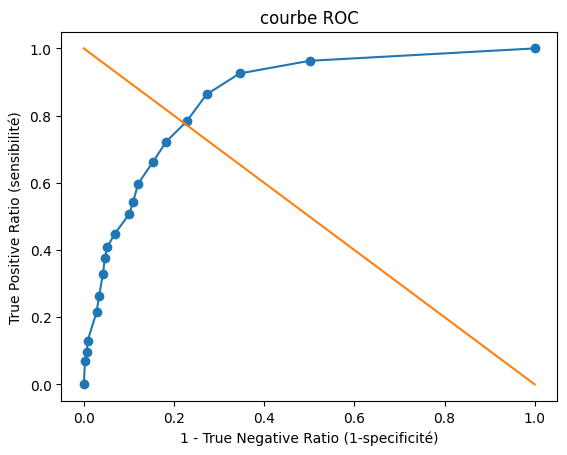

In [14]:
#Estimation de la vraisemblance des observations des pixels de teinte chaire
m = np.mean(Peau_Train, axis=0)
cov = np.cov(Peau_Train, rowvar=False)
p = multivariate_normal(m, cov) 
p_train = p.pdf(X_train)

#Courbe ROC
NB = 20
SEUILS = np.linspace(np.min(p_train), np.max(p_train), NB) 
sensibilites = []; specificites = []
for s in SEUILS :
    p_train_seuillee = [1 if p > s else 0 for p in p_train ] #on seuille par s
    conf_matrice=confusion_matrix(y_train, p_train_seuillee) #(y_verité,y_prediction)
    #Matrice de confusion [0:NonChaire|1:Chaire]
    TP = conf_matrice[1,1]; TN = conf_matrice[0,0]  #On prend en compte l'ordre pour que Prositif = chair
    FP = conf_matrice[0,1]; FN = conf_matrice[1,0]
    sensibilites.append(TP/(TP+FN))
    specificites.append(TN/(FP+TN))

specificites=np.array(specificites)
plt.plot(1-specificites,sensibilites,'o-')
plt.plot([0,1],[1,0])
plt.title('courbe ROC')
plt.xlabel("1 - True Negative Ratio (1-specificité)")
plt.ylabel("True Positive Ratio (sensibilité)");

In [15]:
print("Au Point EER (approximatif: point le plus proche sur la courbe ROC) :")
rang_seuil_EER = [i for i,s in enumerate(sensibilites) if np.isclose(s, specificites[i],0.015)]
print(f'sensibilité : {sensibilites[rang_seuil_EER[0]]:.2f}\n\
specificité : {specificites[rang_seuil_EER[0]]:.2f}')

SEUIL_EER = SEUILS[rang_seuil_EER[0]]
p_train_seuillee = [1 if p > SEUIL_EER else 0 for p in p_train ] #on seuille par SEUIL_EER

conf_matrice=confusion_matrix(y_train, p_train_seuillee) #(y_verité,y_prediction)
#créé Matrice de confusion [0:NonChaire|1:Chaire]
print("Matrice de confusion [0:Chaire|1:NonChaire]:\n",conf_matrice)

score = accuracy_score(y_train, p_train_seuillee)  # (y_verité,y_prediction)
print(f"taux de reconnaissance : {score*100:.2f} %")


Au Point EER (approximatif: point le plus proche sur la courbe ROC) :
sensibilité : 0.78
specificité : 0.77
Matrice de confusion [0:Chaire|1:NonChaire]:
 [[2695  796]
 [ 271  977]]
taux de reconnaissance : 77.48 %


In [16]:
#Base de tests
p_test = p.pdf(X_test)
p_test_seuillee = [1 if p > SEUIL_EER else 0 for p in p_test ] #on seuille par SEUIL_EER

conf_matrice=confusion_matrix(y_test, p_test_seuillee) #(y_verité,y_prediction)
#créé Matrice de confusion [0:NonChaire|1:Chaire]
print("Matrice de confusion [0:Chaire|1:NonChaire]:\n",conf_matrice)

score = accuracy_score(y_test, p_test_seuillee)  # (y_verité,y_prediction)
print(f"taux de reconnaissance (point EER) des pixels de test: {score*100:.2f} %")

Matrice de confusion [0:Chaire|1:NonChaire]:
 [[319  93]
 [  7 147]]
taux de reconnaissance (point EER) des pixels de test: 82.33 %


On a une légèrement meilleur accuracy (taux de reconnaissance), sensibilité et spécificité.\
Ce modèle statisque est une meilleur approximation, donnant de meilleurs résultats.

## IV. Test sur une nouvelle image

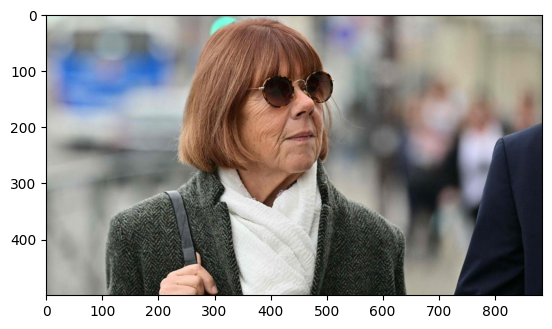

In [17]:

image_test = Image.open('image.jpg')
plt.imshow(image_test)
image_test = np.array(image_test.convert('YCbCr'))

In [18]:
def predict_isPeau(X_test):
    p_test = p.pdf(X_test)
    return True if p_test > SEUIL_EER else False
def display_result(isPeau):
    if isPeau:
        print("Le pixel correspond de la peau. (prédiction statistque)")
    else:
        print("Le pixel ne correspond pas à la peau. (prédiction statistque)")

#On test le point (x=400,y=200) qui devrait être peau
(x,y)=(400,200)
point_test = image_test[y,x,(1,2)]
display_result(predict_isPeau(point_test))

Le pixel correspond de la peau. (prédiction statistque)


Text(0.5, 1.0, 'domaine de reconnaissance classe "Peau" (en blanc)')

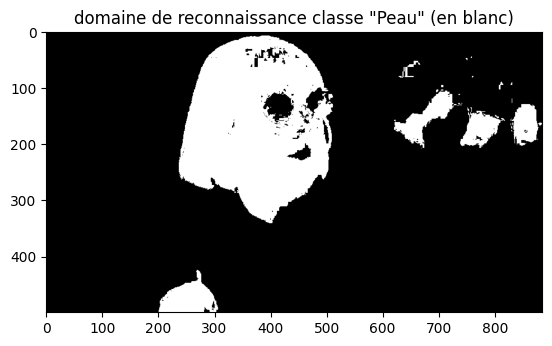

In [ ]:
#On teste sur toute l'image
(height,width) = (image_test.shape[0],image_test.shape[1])
img_pred = np.empty(shape=(height,width))
for y in range(height):
    for x in range(width):
        p_test = p.pdf(image_test[y,x,(1,2)])
        img_pred[y,x] =  1 if p_test > SEUIL_EER else 0
plt.imshow(img_pred,cmap='grey')
plt.title('domaine de reconnaissance classe "Peau" (en blanc)');

C:\Users\flori\AppData\Local\Temp\ipykernel_8532\1385673325.py:5: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_masked = Image.fromarray(image_masked,mode='YCbCr')


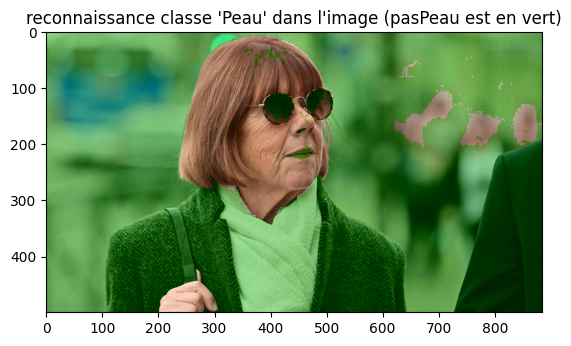

In [52]:
img_pre = np.array(img_pred)
img_pred2 = np.where(img_pred >= 1, 1, 0.8)
image_masked = np.array([[image_test[y,x] * img_pred2[y,x] for x in range(width)] for y in range(height)])
image_masked = image_masked.astype(np.uint8)
image_masked = Image.fromarray(image_masked,mode='YCbCr')
plt.imshow(image_masked)
plt.title("reconnaissance classe 'Peau' dans l'image (pasPeau est en vert)");